# Module Importation

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("../data/data.csv", sep=";")


In [37]:
df.head(10)

,Time,Physical cell identity (pcell),Band (pcell),RSRP (pcell),RSRQ (pcell),RLC downlink throughput
0,9:39:11.769,224.0,LTE FDD 1800 band 3,-77.0,-5.0,NaN
1,9:39:11.769,NaN,NaN,NaN,NaN,0.0
2,9:39:12.003,NaN,NaN,NaN,NaN,0.0
3,9:39:12.769,224.0,LTE FDD 1800 band 3,-77.0,-5.0,NaN
4,9:39:12.769,NaN,NaN,NaN,NaN,0.0
5,9:39:12.963,NaN,NaN,NaN,NaN,0.0
6,9:39:13.769,224.0,LTE FDD 1800 band 3,-77.0,-5.0,NaN
7,9:39:13.769,NaN,NaN,NaN,NaN,0.0
8,9:39:13.923,NaN,NaN,NaN,NaN,0.0
9,9:39:14.769,224.0,LTE FDD 1800 band 3,-77.0,-7.0,NaN


# Merge rows with the same Time value to recover the RLC downlink throughput feature

In [38]:
import pandas as pd

# Loop through the rows and merge those having the same "Time"
i = 0
while i < len(df) - 1:  # Iterate over rows
    if df.loc[i, 'Time'] == df.loc[i + 1, 'Time']:  # Check if "Time" values are identical
        # If row i+1 has a value for RLC but not for the other columns, merge the rows
        if pd.notna(df.loc[i + 1, 'RLC downlink throughput']) and pd.isna(df.loc[i, 'RLC downlink throughput']):
            df.loc[i, 'RLC downlink throughput'] = df.loc[i + 1, 'RLC downlink throughput']

        # Merge other columns: take the non-NaN value from each column
        for col in df.columns:
            if pd.isna(df.loc[i, col]) and pd.notna(df.loc[i + 1, col]):
                df.loc[i, col] = df.loc[i + 1, col]

        # Delete row i+1 (the row that was merged into row i)
        df.drop(i + 1, inplace=True)

        # Reindex after each deletion
        df.reset_index(drop=True, inplace=True)

    else:
        # Move to the next row
        i += 1

# Display the first 10 rows of the cleaned dataframe
print(df.head(10))

           Time  Physical cell identity (pcell)         Band (pcell)  \
0   9:39:11.769                           224.0  LTE FDD 1800 band 3   
1   9:39:12.003                             NaN                  NaN   
2   9:39:12.769                           224.0  LTE FDD 1800 band 3   
3   9:39:12.963                             NaN                  NaN   
4   9:39:13.769                           224.0  LTE FDD 1800 band 3   
5   9:39:13.923                             NaN                  NaN   
6   9:39:14.769                           224.0  LTE FDD 1800 band 3   
7   9:39:14.883                             NaN                  NaN   
8   9:39:15.769                           224.0  LTE FDD 1800 band 3   
9   9:39:15.843                             NaN                  NaN   

   RSRP (pcell)  RSRQ (pcell)  RLC downlink throughput  
0         -77.0          -5.0                      0.0  
1           NaN           NaN                      0.0  
2         -77.0          -5.0       

# Remove rows that contain more than 4 NaN values

In [39]:
df = df[df.isna().sum(axis=1) < 4].reset_index(drop=True)


In [40]:
df["RLC downlink throughput"] = df["RLC downlink throughput"].fillna(df["RLC downlink throughput"].median())


In [41]:
print(df.isnull().sum())


Time                              0
Physical cell identity (pcell)    0
Band (pcell)                      0
RSRP (pcell)                      0
RSRQ (pcell)                      0
RLC downlink throughput           0
dtype: int64


In [42]:
df.shape

(3426, 6)

# Encoding Categorical Column “Band (pcell)” into Numeric Values using LabelEncoder

In [43]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["Band (pcell)"] = le.fit_transform(df["Band (pcell)"])
# Vérification des classes
print(le.classes_) 
print(df["Band (pcell)"].unique())
# Vérifier les résultats
print(df[["Band (pcell)"]].head())
df.to_csv("data_modified_band_column_numeric.csv", index=False)


['LTE FDD 1800 band 3' 'LTE FDD 800 band 20']
[0 1]
   Band (pcell)
0             0
1             0
2             0
3             0
4             0


In [44]:
df

,Time,Physical cell identity (pcell),Band (pcell),RSRP (pcell),RSRQ (pcell),RLC downlink throughput
0,9:39:11.769,224.0,0,-77.0,-5.0,0.0
1,9:39:12.769,224.0,0,-77.0,-5.0,0.0
2,9:39:13.769,224.0,0,-77.0,-5.0,0.0
3,9:39:14.769,224.0,0,-77.0,-7.0,0.0
4,9:39:15.769,224.0,0,-77.0,-6.0,14.7
...,...,...,...,...,...,...
3421,10:36:19.684,224.0,1,-75.0,-7.0,20.8
3422,10:36:20.684,224.0,1,-75.0,-9.0,22.7
3423,10:36:21.684,224.0,1,-75.0,-9.0,16.7
3424,10:36:22.684,224.0,1,-75.0,-9.0,22.1


# Histogram of each column (feature)


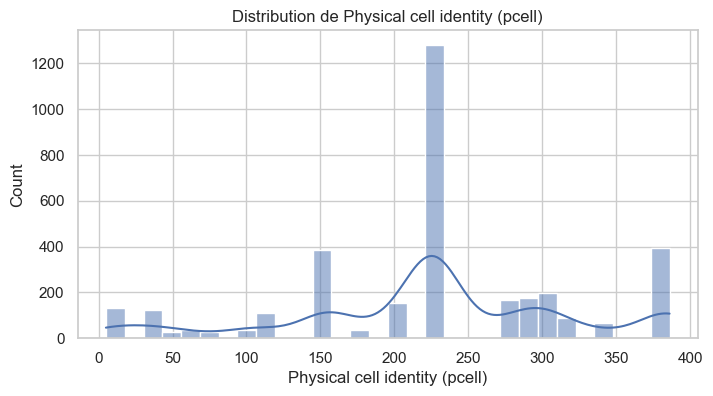

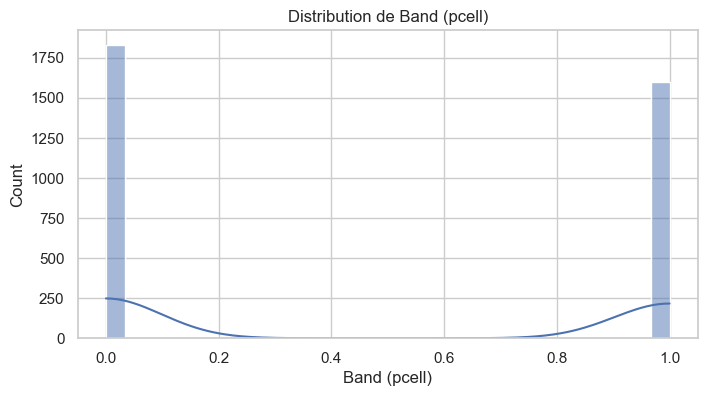

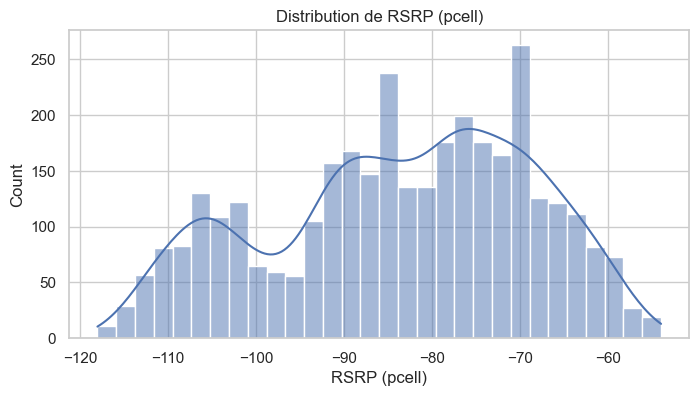

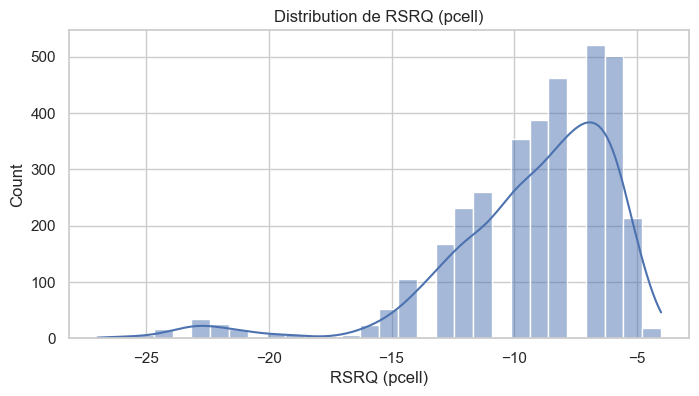

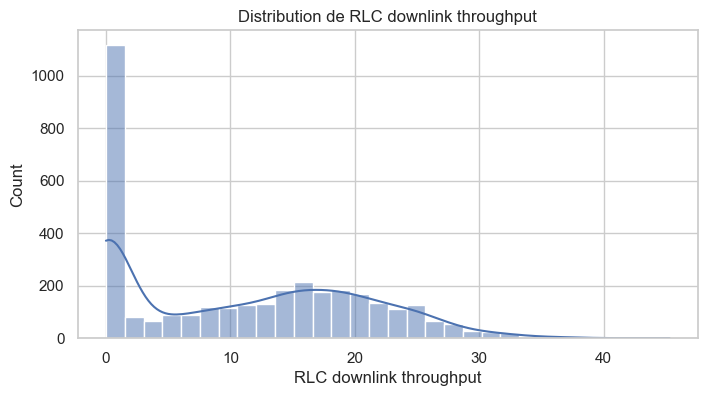

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

cols_to_analyze = ['Physical cell identity (pcell)', 'Band (pcell)', 'RSRP (pcell)', 'RSRQ (pcell)', 'RLC downlink throughput']
for col in cols_to_analyze:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution de {col}")
    plt.show()

# SINR Calculation

In [46]:
# Function to assign N (Number of Resource Blocks) based on the band
def assign_N(band):
    if band == 0:
        return 6  # Band 3 (LTE 1800) -> N = 6
    elif band == 1:
        return 100  # Band 20 (LTE 800) -> N = 100
    else:
        return np.nan  

# Apply the function to calculate N
df["N"] = df["Band (pcell)"].apply(assign_N)

# Calculate SINR using the formula: SINR = RSRQ + 10 * log10(N)
df["SINR"] = df["RSRQ (pcell)"] + 10 * np.log10(df["N"])

# Display the first few rows
print(df)


              Time  Physical cell identity (pcell)  Band (pcell)  \
0      9:39:11.769                           224.0             0   
1      9:39:12.769                           224.0             0   
2      9:39:13.769                           224.0             0   
3      9:39:14.769                           224.0             0   
4      9:39:15.769                           224.0             0   
...            ...                             ...           ...   
3421  10:36:19.684                           224.0             1   
3422  10:36:20.684                           224.0             1   
3423  10:36:21.684                           224.0             1   
3424  10:36:22.684                           224.0             1   
3425  10:36:23.685                           224.0             1   

      RSRP (pcell)  RSRQ (pcell)  RLC downlink throughput    N       SINR  
0            -77.0          -5.0                      0.0    6   2.781513  
1            -77.0          -5.

In [47]:
# Remove the "N" column
df= df.drop(columns=["N"])

In [48]:
df

,Time,Physical cell identity (pcell),Band (pcell),RSRP (pcell),RSRQ (pcell),RLC downlink throughput,SINR
0,9:39:11.769,224.0,0,-77.0,-5.0,0.0,2.781513
1,9:39:12.769,224.0,0,-77.0,-5.0,0.0,2.781513
2,9:39:13.769,224.0,0,-77.0,-5.0,0.0,2.781513
3,9:39:14.769,224.0,0,-77.0,-7.0,0.0,0.781513
4,9:39:15.769,224.0,0,-77.0,-6.0,14.7,1.781513
...,...,...,...,...,...,...,...
3421,10:36:19.684,224.0,1,-75.0,-7.0,20.8,13.000000
3422,10:36:20.684,224.0,1,-75.0,-9.0,22.7,11.000000
3423,10:36:21.684,224.0,1,-75.0,-9.0,16.7,11.000000
3424,10:36:22.684,224.0,1,-75.0,-9.0,22.1,11.000000


<function matplotlib.pyplot.show(close=None, block=None)>

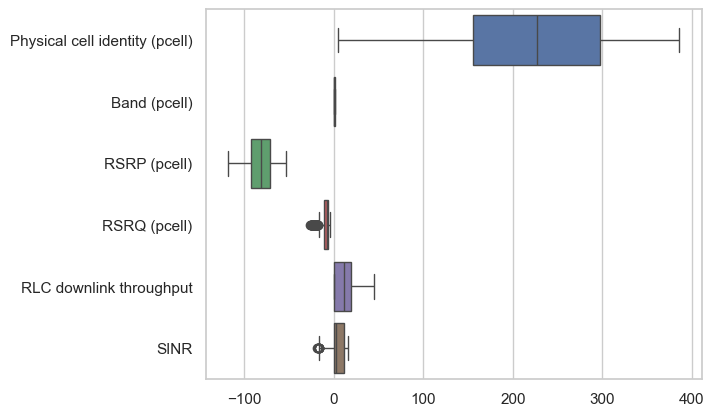

In [49]:
# Visualize the distribution and outliers of each column
sns.set(style='whitegrid')
sns.boxplot(data=df,orient='h')
plt.show

# Outliers

In [50]:
# Remove outliers directly in df
numerical_cols = df.select_dtypes('number').columns

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    if IQR == 0:
        continue  # Skip columns with zero IQR

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df = df[(df[col] > lower_bound) & (df[col] < upper_bound)]

<function matplotlib.pyplot.show(close=None, block=None)>

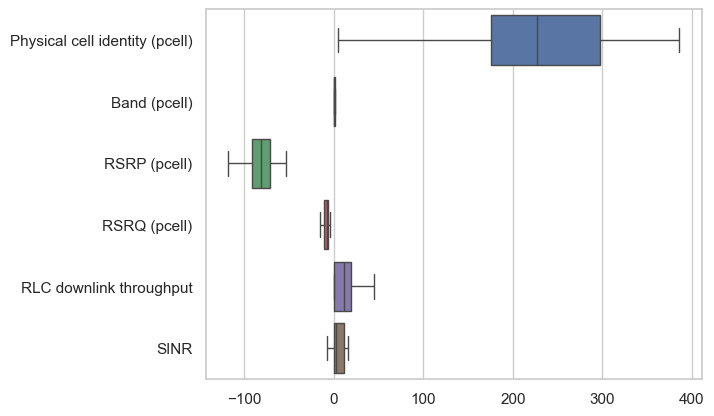

In [51]:
sns.set(style='whitegrid')
sns.boxplot(data=df,orient='h')
plt.show

In [52]:
df1=df.copy()

In [53]:
# Keep only the rows where the "Time" column is not missing (NaN)
df = df[df["Time"].notna()]

# Handover Calculation

In [54]:
# Add previous and next cell
df_valid = df.copy()
df_valid["Previous_Cell"] = df_valid["Physical cell identity (pcell)"].shift(1)
df_valid["Next_Cell"] = df_valid["Physical cell identity (pcell)"].shift(-1)

# Successful handover: cell change
df_valid["Successful_Handover"] = df_valid["Physical cell identity (pcell)"] != df_valid["Previous_Cell"]

# Failed handover: change followed by immediate return to the previous cell
df_valid["Failed_Handover"] = (df_valid["Physical cell identity (pcell)"] != df_valid["Previous_Cell"]) & \
                              (df_valid["Next_Cell"] == df_valid["Previous_Cell"])

# Results
print("Number of successful handovers:", df_valid["Successful_Handover"].sum())
print("Number of failed handovers:", df_valid["Failed_Handover"].sum())


Number of successful handovers: 122
Number of failed handovers: 11


In [55]:
df_valid = df_valid.drop(columns=['Previous_Cell', 'Next_Cell'])


In [56]:
df_valid

,Time,Physical cell identity (pcell),Band (pcell),RSRP (pcell),RSRQ (pcell),RLC downlink throughput,SINR,Successful_Handover,Failed_Handover
0,9:39:11.769,224.0,0,-77.0,-5.0,0.0,2.781513,True,False
1,9:39:12.769,224.0,0,-77.0,-5.0,0.0,2.781513,False,False
2,9:39:13.769,224.0,0,-77.0,-5.0,0.0,2.781513,False,False
3,9:39:14.769,224.0,0,-77.0,-7.0,0.0,0.781513,False,False
4,9:39:15.769,224.0,0,-77.0,-6.0,14.7,1.781513,False,False
...,...,...,...,...,...,...,...,...,...
3421,10:36:19.684,224.0,1,-75.0,-7.0,20.8,13.000000,False,False
3422,10:36:20.684,224.0,1,-75.0,-9.0,22.7,11.000000,False,False
3423,10:36:21.684,224.0,1,-75.0,-9.0,16.7,11.000000,False,False
3424,10:36:22.684,224.0,1,-75.0,-9.0,22.1,11.000000,False,False


# Add the target QoS column

In [23]:
# Function to classify RSRP values
def classifier_rsrp(value):
    if value >= -80:
        return 'Good'
    elif -95 < value < -80:
        return 'Normal'
    elif -110 < value <= -95:
        return 'Low'
    else:
        return 'Bad'

# Function to classify RSRQ values
def classifier_rsrq(value):
    if value > -8:
        return 'Good'
    elif -10 < value <= -8:
        return 'Normal'
    elif -15 < value <= -10:
        return 'Low'
    else:
        return 'Bad'

# Function to classify throughput values
def classifier_throughput(value):
    if value >= 20:
        return 'Good'
    elif 10 < value < 20:
        return 'Normal'
    elif 5 < value <= 10:
        return 'Low'
    else:
        return 'Bad'

# Function to classify SINR values
def classifier_sinr(value):
    if value > 10:
        return 'Good'
    elif 0 <= value <= 10:
        return 'Normal'
    elif -10 <= value < 0:
        return 'Low'
    else:
        return 'Bad'


# Evaluate QoS for Each Row Based on Key Metrics and Handovers

In [24]:
def evaluate_qos(row):
    # Check if throughput is zero
    if row['RLC downlink throughput'] == 0: 
        print(f"Throughput equal to 0 detected for RSRP: {row['RSRP (pcell)']}, RSRQ: {row['RSRQ (pcell)']}")
        return 0  # Poor QoS

    # Classification of main parameters
    rsrp_cat = classifier_rsrp(row['RSRP (pcell)'])
    rsrq_cat = classifier_rsrq(row['RSRQ (pcell)'])
    thrpt_cat = classifier_throughput(row['RLC downlink throughput'])
    sinr_cat = classifier_sinr(row['SINR'])

    # Direct retrieval of handovers
    ho_success = row.get('Successful_Handover', 0)
    ho_failed = row.get('Failed_Handover', 0)

    # Combined logic to evaluate a numeric QoS score
    if all(cat == 'Good' for cat in [rsrp_cat, rsrq_cat, thrpt_cat, sinr_cat]) and ho_failed == 0:
        return 1  # High score
    elif thrpt_cat == 'Low' and sinr_cat == 'Low' and ho_failed > ho_success:
        return 0  # Poor QoS
    elif any(cat == 'Bad' for cat in [rsrp_cat, rsrq_cat, thrpt_cat, sinr_cat]) or ho_failed >= 3:
        return 0.1  # Critical QoS
    elif rsrp_cat == 'Low' and thrpt_cat == 'Low':
        return 0.2  # Low coverage
    else:
        return 0.5  # Average QoS (Other cases)


In [25]:
# Apply the function to each row of the dataframe
df['qos'] = df.apply(evaluate_qos, axis=1)

Throughput equal to 0 detected for RSRP: -77.0, RSRQ: -5.0
Throughput equal to 0 detected for RSRP: -77.0, RSRQ: -5.0
Throughput equal to 0 detected for RSRP: -77.0, RSRQ: -5.0
Throughput equal to 0 detected for RSRP: -77.0, RSRQ: -7.0
Throughput equal to 0 detected for RSRP: -76.0, RSRQ: -5.0
Throughput equal to 0 detected for RSRP: -76.0, RSRQ: -5.0
Throughput equal to 0 detected for RSRP: -78.0, RSRQ: -4.0
Throughput equal to 0 detected for RSRP: -77.0, RSRQ: -5.0
Throughput equal to 0 detected for RSRP: -80.0, RSRQ: -6.0
Throughput equal to 0 detected for RSRP: -76.0, RSRQ: -6.0
Throughput equal to 0 detected for RSRP: -78.0, RSRQ: -7.0
Throughput equal to 0 detected for RSRP: -81.0, RSRQ: -6.0
Throughput equal to 0 detected for RSRP: -78.0, RSRQ: -5.0
Throughput equal to 0 detected for RSRP: -72.0, RSRQ: -4.0
Throughput equal to 0 detected for RSRP: -80.0, RSRQ: -5.0
Throughput equal to 0 detected for RSRP: -83.0, RSRQ: -6.0
Throughput equal to 0 detected for RSRP: -83.0, RSRQ: -7

In [26]:
df

,Time,Physical cell identity (pcell),Band (pcell),RSRP (pcell),RSRQ (pcell),RLC downlink throughput,SINR,qos
0,9:39:11.769,224.0,0,-77.0,-5.0,0.0,2.781513,0.0
1,9:39:12.769,224.0,0,-77.0,-5.0,0.0,2.781513,0.0
2,9:39:13.769,224.0,0,-77.0,-5.0,0.0,2.781513,0.0
3,9:39:14.769,224.0,0,-77.0,-7.0,0.0,0.781513,0.0
4,9:39:15.769,224.0,0,-77.0,-6.0,14.7,1.781513,0.5
...,...,...,...,...,...,...,...,...
3421,10:36:19.684,224.0,1,-75.0,-7.0,20.8,13.000000,1.0
3422,10:36:20.684,224.0,1,-75.0,-9.0,22.7,11.000000,0.5
3423,10:36:21.684,224.0,1,-75.0,-9.0,16.7,11.000000,0.5
3424,10:36:22.684,224.0,1,-75.0,-9.0,22.1,11.000000,0.5


In [27]:
print(df.shape)

(3298, 8)


In [35]:
df.to_csv("data_processed.csv", index=False, sep=";")
